#Imports

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
df = pd.read_csv('/content/drive/MyDrive/Airlines.csv')
df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


#Explore the data

In [51]:
df.shape

(539383, 9)

In [52]:
df.describe()

,id,Flight,DayOfWeek,Time,Length,Delay
count,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,269692.000000,2427.928630,3.929668,802.728963,132.202007,0.445442
std,155706.604461,2067.429837,1.914664,278.045911,70.117016,0.497015
min,1.000000,1.000000,1.000000,10.000000,0.000000,0.000000
25%,134846.500000,712.000000,2.000000,565.000000,81.000000,0.000000
50%,269692.000000,1809.000000,4.000000,795.000000,115.000000,0.000000
75%,404537.500000,3745.000000,5.000000,1035.000000,162.000000,1.000000
max,539383.000000,7814.000000,7.000000,1439.000000,655.000000,1.000000


In [53]:
df.nunique()

id             539383
Airline            18
Flight           6585
AirportFrom       293
AirportTo         293
DayOfWeek           7
Time             1131
Length            426
Delay               2
dtype: int64

In [54]:
df.isnull().sum()

id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

#Data Preprocessing

## Data Cleaning

###1- drop columns id and flight

In [55]:
df.drop(columns=['id'], inplace=True)
df.drop(columns=['Flight'], inplace=True)

###2- Data binning

In [56]:
# Function to round to nearest multiple of 100
def round_to_nearest_100(x):
    return np.ceil(x / 100) * 100

df['Time'] = df['Time'].apply(round_to_nearest_100)
df['Length'] = df['Length'].apply(round_to_nearest_100)

###3- Drop duplicates

In [57]:
df = df.drop_duplicates(keep='first')

##check the data after cleaning

In [58]:
df.head()

,Airline,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,CO,SFO,IAH,3,100.0,300.0,1
1,US,PHX,CLT,3,100.0,300.0,1
2,AA,LAX,DFW,3,100.0,200.0,1
3,AA,SFO,DFW,3,100.0,200.0,1
4,AS,ANC,SEA,3,100.0,300.0,0


## Dimentionality Reduction

### 4- Multiple Correspondence Analysis (MCA)

In [59]:
!pip install prince

In [60]:
import prince

mca = prince.MCA(
    n_components=3,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)
mca = mca.fit(df)
mca_coordinates = mca.transform(df)

In [61]:
print(mca_coordinates.head())

          0         1         2
0  0.682743  0.155804  1.263194
1  0.485823  0.311228  0.966278
2  0.549346  0.137619  0.347868
3  0.584768 -0.098143  0.378116
4  2.759014  0.218547  1.425746


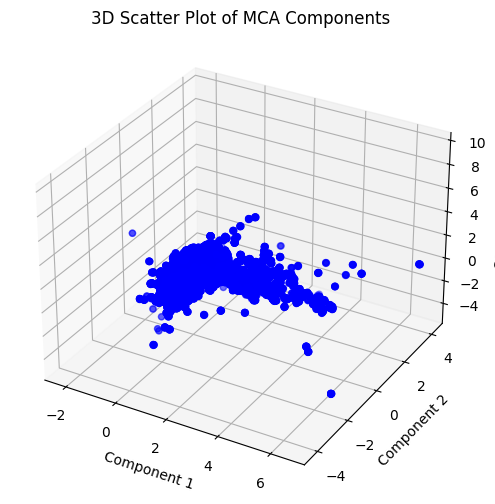

In [62]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for three principal components
ax.scatter(mca_coordinates[0], mca_coordinates[1], mca_coordinates[2], c='blue', marker='o')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.title('3D Scatter Plot of MCA Components')
plt.show()

# Exploratory Data Analysis (EDA):

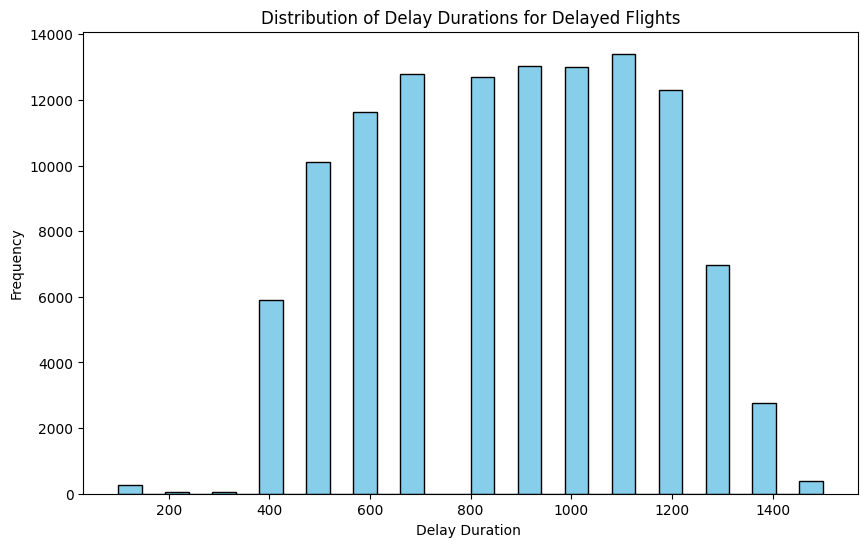

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter to include only delayed flights
delayed_flights = df[df['Delay'] == 1]

plt.figure(figsize=(10, 6))
plt.hist(delayed_flights['Time'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Delay Durations for Delayed Flights')
plt.xlabel('Delay Duration ')
plt.ylabel('Frequency')
plt.show()

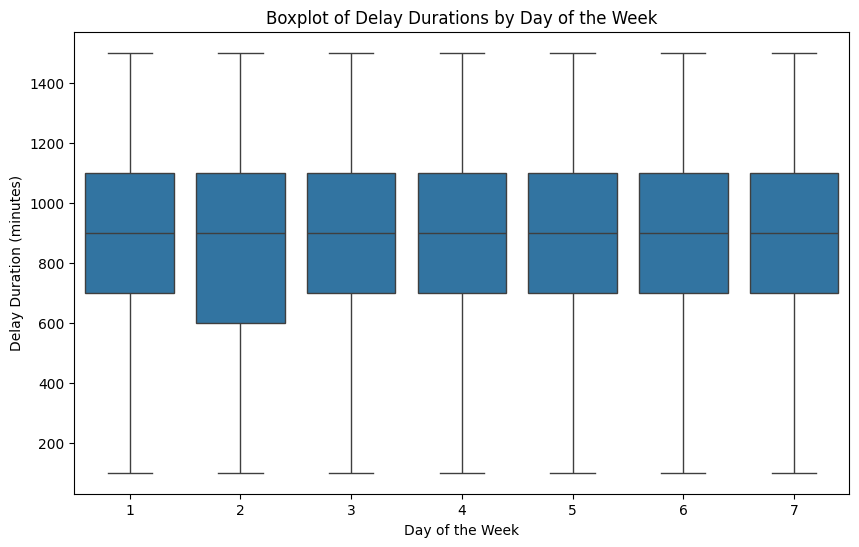

In [65]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='DayOfWeek', y='Time', data=delayed_flights)
plt.title('Boxplot of Delay Durations by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Delay Duration (minutes)')
plt.show()

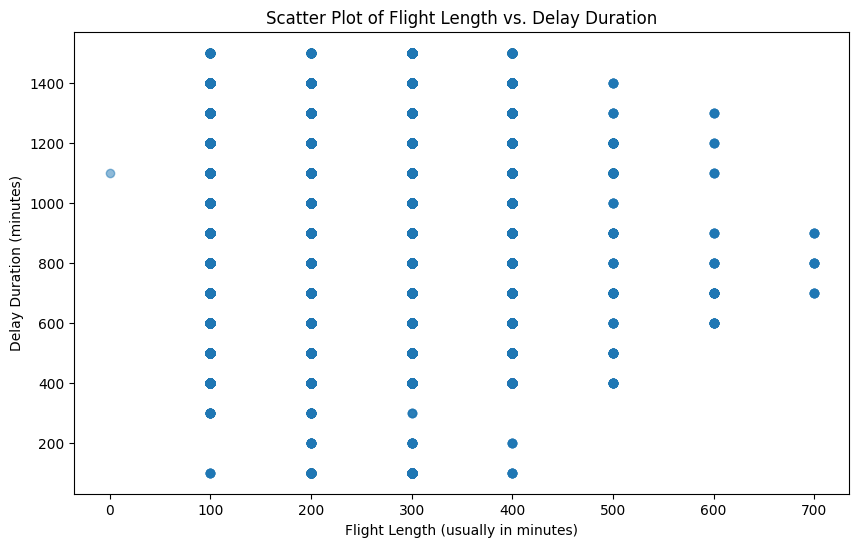

In [66]:
plt.figure(figsize=(10, 6))
plt.scatter(delayed_flights['Length'], delayed_flights['Time'], alpha=0.5)
plt.title('Scatter Plot of Flight Length vs. Delay Duration')
plt.xlabel('Flight Length (usually in minutes)')
plt.ylabel('Delay Duration (minutes)')
plt.show()

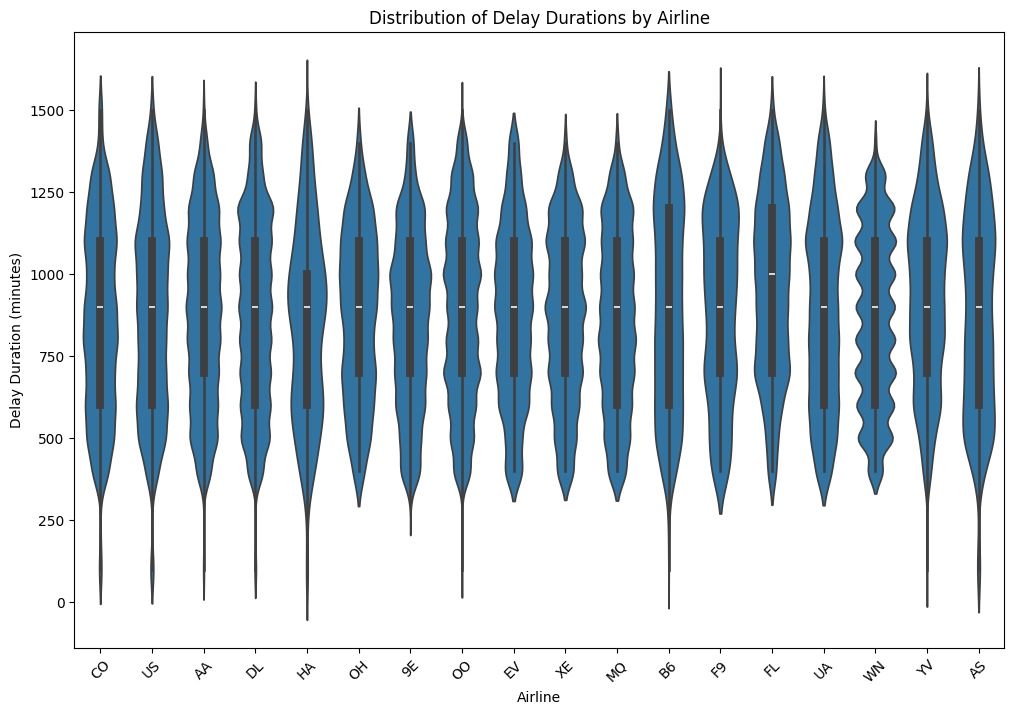

In [67]:
# Assuming 'Airline' column exists
plt.figure(figsize=(12, 8))
sns.violinplot(x='Airline', y='Time', data=df[df['Delay'] == 1])
plt.title('Distribution of Delay Durations by Airline')
plt.xlabel('Airline')
plt.ylabel('Delay Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

